In [1]:
#coding=utf-8
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
f = pd.read_csv('./atbats.csv')

##  1.标称属性列

观察文件可知，标称属性列为 `event`, `p_throws`, `stand`,`top`, 打印出其每列每一可能取值的频数

In [8]:
for x in ['event', 'p_throws', 'stand', 'top']:
    print('%s:' % x)
    print(f[x].value_counts())
    print()
    

event:
Strikeout               157128
Groundout               134893
Single                  108794
Flyout                   80731
Walk                     56894
Lineout                  44934
Pop Out                  34455
Double                   33157
Home Run                 22209
Forceout                 15112
Grounded Into DP         14717
Hit By Pitch              6938
Field Error               6390
Sac Fly                   4773
Sac Bunt                  3969
Intent Walk               3782
Triple                    3454
Double Play               1807
Runner Out                1742
Bunt Groundout            1253
Fielders Choice Out       1250
Strikeout - DP             580
Bunt Pop Out               569
Fielders Choice            395
Batter Interference        158
Catcher Interference       153
Sac Fly DP                  76
Bunt Lineout                52
Triple Play                 20
Sacrifice Bunt DP            4
Name: event, dtype: int64

p_throws:
R    542102
L    198287
Na

##  2.数值属性列
### 2.1 摘要

数值属性列有 `batter_id`, `g_id`, `innint`, `o`, `p_score`, `pitcher_id`, 打印出最大、最小、均值、中位数、四分位数及缺失值个数


In [11]:
for x in ['batter_id', 'g_id', 'inning', 'o', 'p_score', 'pitcher_id']:
    print('%s列' % x)
    print('最大值:%s' % f[x].max(), '最小值:%s' % f[x].min(), '平均值:%s' % f[x].mean(),
          '下四分位数:%s' % f[x].quantile(0.25), '中位数:%s' % f[x].quantile(0.5), '上四分位数:%s' % f[x].quantile(0.75), '缺失值个数:%s' % f[x].isnull().sum())

batter_id列
最大值:673633 最小值:112526 平均值:520222.97150416876 下四分位数:457759.0 中位数:519317.0 上四分位数:592273.0 缺失值个数:0
g_id列
最大值:201802431 最小值:201500001 平均值:201651556.15267786 下四分位数:201600013.0 中位数:201700015.0 上四分位数:201800006.0 缺失值个数:0
inning列
最大值:19 最小值:1 平均值:5.008160575049062 下四分位数:3.0 中位数:5.0 上四分位数:7.0 缺失值个数:0
o列
最大值:3 最小值:0 平均值:1.676713187256969 下四分位数:1.0 中位数:2.0 上四分位数:2.0 缺失值个数:0
p_score列
最大值:25 最小值:0 平均值:2.286257629435337 下四分位数:0.0 中位数:1.0 上四分位数:4.0 缺失值个数:0
pitcher_id列
最大值:673633 最小值:112526 平均值:526829.7291356301 下四分位数:462136.0 中位数:534910.0 上四分位数:592836.0 缺失值个数:0


### 2.2 数值属性列可视化

**2.2.1 `batter_id`可视化**

直方图如下图所示：

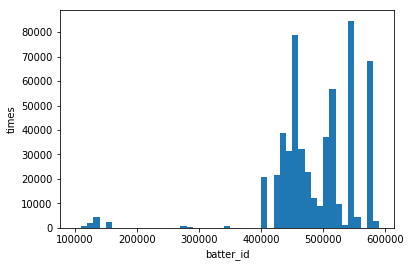

In [12]:
df = f.batter_id.sort_values(ascending=False)
binsVal = np.arange(100000, 600000, 10000)
plt.hist(df, bins=binsVal)
plt.xlabel('batter_id')
plt.ylabel('times')
plt.show()

`batter_id`的qq图如下图所示，：

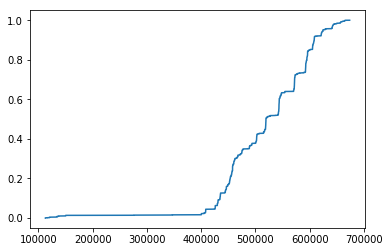

In [13]:
batter_id = f['batter_id']
sorted_ = np.sort(batter_id)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

标准正太分布图如下所示(只在此处打印，此后不再重复)，显然`batter_id`不符合正太分布：


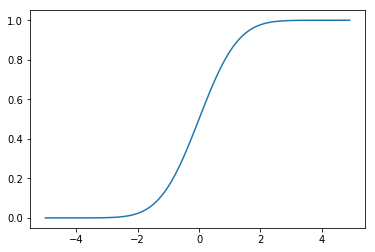

In [14]:
from scipy import stats
x = np.arange(-5, 5, 0.1)
y = stats.norm.cdf(x, 0, 1)
plt.plot(x, y)

`batter_id`的盒图如图所示, 有低于下限的离群点：

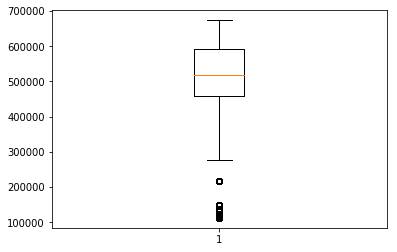

In [16]:
fig, ax = plt.subplots()
ax.boxplot(f['batter_id'])
plt.show()

**2.2.2 `g_id`可视化**

观察`g_id`推测其与年份有关系，故选取较大的间距

直方图如下图所示：

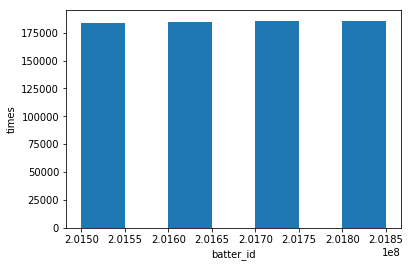

In [17]:
df = f.g_id.sort_values(ascending=False)
binsVal = np.arange(201500000, 201900000, 50000)
plt.hist(df, bins=binsVal)
plt.xlabel('batter_id')
plt.ylabel('times')
plt.show()

qq图如下所示，显然不满足正太分布

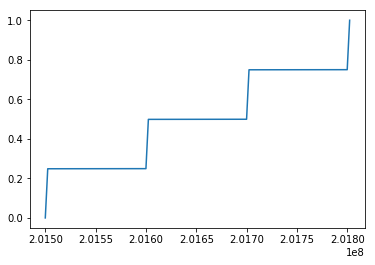

In [18]:
g_id = f['g_id']
sorted_ = np.sort(g_id)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

盒图如下图所示，无离群点：

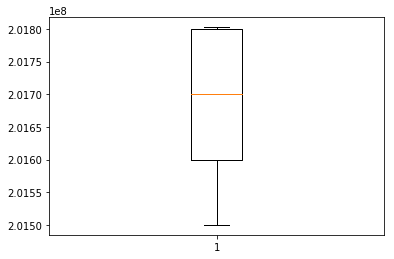

In [19]:
fig, ax = plt.subplots()
ax.boxplot(f['g_id'])
plt.show()

**2.2.3 `o`可视化**

观察可知，`o` 取值为 `[0, 1, 2,3]`

直方图如下图所示：


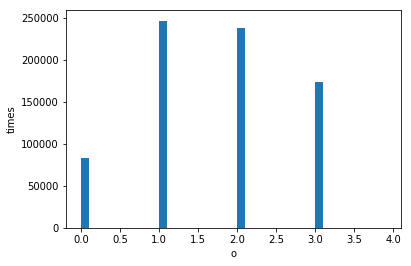

In [20]:
df = f.o.sort_values(ascending=False)
binsVal = np.arange(0, 4, 0.1)
plt.hist(df, bins=binsVal)
plt.xlabel('o')
plt.ylabel('times')
plt.show()

qq图如下所示，显然不满足正太分布

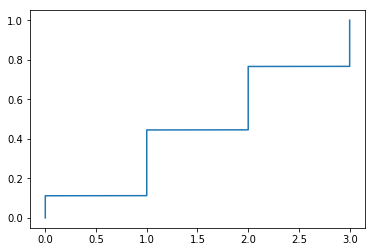

In [21]:
o = f['o']
sorted_ = np.sort(o)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

盒图如下所示，无离群点

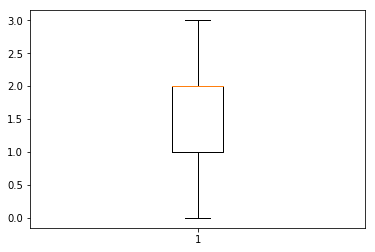

In [22]:
fig, ax = plt.subplots()
ax.boxplot(f['o'])
plt.show()

**2.2.4. `p_score`可视化**

直方图如下图所示：

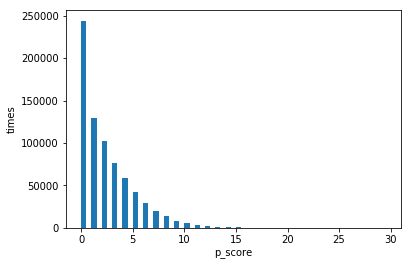

In [23]:
df = f.p_score.sort_values(ascending=False)
binsVal = np.arange(0, 30, 0.5)
plt.hist(df, bins=binsVal)
plt.xlabel('p_score')
plt.ylabel('times')
plt.show()

qq图如下图所示，显然不满足正太分布：


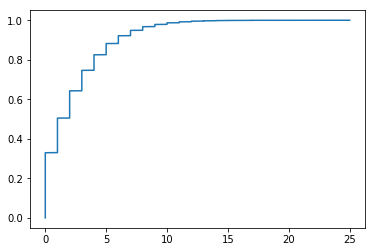

In [24]:
p_score = f['p_score']
sorted_ = np.sort(p_score)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

盒图如下图所示，有高于上线的离群点：

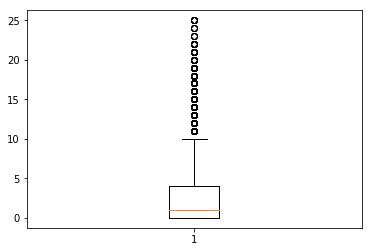

In [25]:
fig, ax = plt.subplots()
ax.boxplot(f['p_score'])
plt.show()

**2.2.5 `pitcher_id`可视化**

直方图如下图所示：

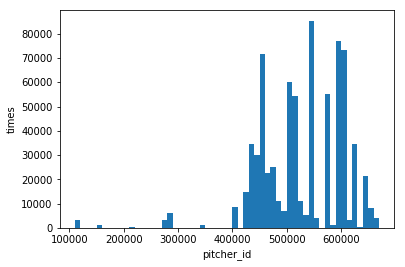

In [9]:
df = f.pitcher_id.sort_values(ascending=False)
binsVal = np.arange(110000, 680000, 10000)
plt.hist(df, bins=binsVal)
plt.xlabel('pitcher_id')
plt.ylabel('times')
plt.show()

qq图如下图所示,不满足正太分布：

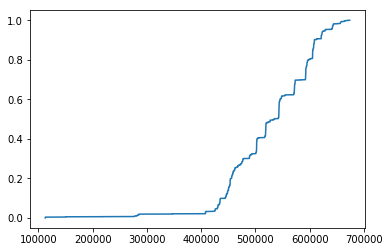

In [27]:
pitcher_id = f['pitcher_id']
sorted_ = np.sort(pitcher_id)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

盒图如下所示, 有低于下限的离群点：

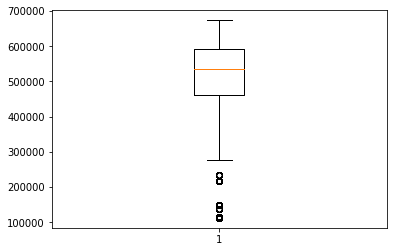

In [28]:
fig, ax = plt.subplots()
ax.boxplot(f['pitcher_id'])
plt.show()

## 3.缺失值处理 

查看各列有多少缺失值，结果显示各列均无缺失值

In [32]:
for x in f.columns:
    print("%s有%s个缺失值" % (x, f[x].isnull().sum()))

ab_id有0个缺失值
batter_id有0个缺失值
event有0个缺失值
g_id有0个缺失值
inning有0个缺失值
o有0个缺失值
p_score有0个缺失值
p_throws有0个缺失值
pitcher_id有0个缺失值
stand有0个缺失值
top有0个缺失值
